# Zaimportowane biblioteki i lista analizowanych plików

In [1]:
#docrepr
ip = get_ipython()
ip.sphinxify_docstring = True
ip.enable_html_pager = True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [3]:
files = sorted(glob('data/*.xls'))

files  #lista plików

['data\\0.000.xls',
 'data\\0.200.xls',
 'data\\0.535.xls',
 'data\\0.535X.xls',
 'data\\0.743.xls']

# Skrypt odczytujący i przetwarzający dane z plików

In [4]:
def process(file_path):
    """
    file_path has to be str
    """

    init_data = pd.read_excel(file_path)
    data = init_data[['Date&Time', 'Unit']]
    values = []

    for i in init_data['MainValue']:
        value = i.replace(',', '.')
        values.append(float(value))

    data.insert(loc=1, column='Value', value=values)

    minutes = []
    means300s = []
    errors = []

    mean30m = data['Value'][-9000:].mean()
    err30m = data['Value'][-9000:].sem()
    meanfull = data['Value'].mean()
    errfull = data['Value'].sem()

    minute = 0

    while not data.empty:
        minutes.append(minute)
        minute += 1
        means300s.append(data['Value'][:300].mean())
        errors.append(data['Value'][:300].sem())
        data = data[300:]

    final_df = pd.DataFrame(
        {
            'minute': minutes,
            'mean300s': means300s,
            'error': errors,
            'mean30m': mean30m,
            'error30m': err30m,
            'meanfull' : meanfull,
            'errfull' : errfull
        }
    )

    return final_df

# Skrypty rysujące wykresy

Wykres zależności napięcia od czasu. Różne serie danych reprezentują hodowle o różnych gęstościach optycznych.

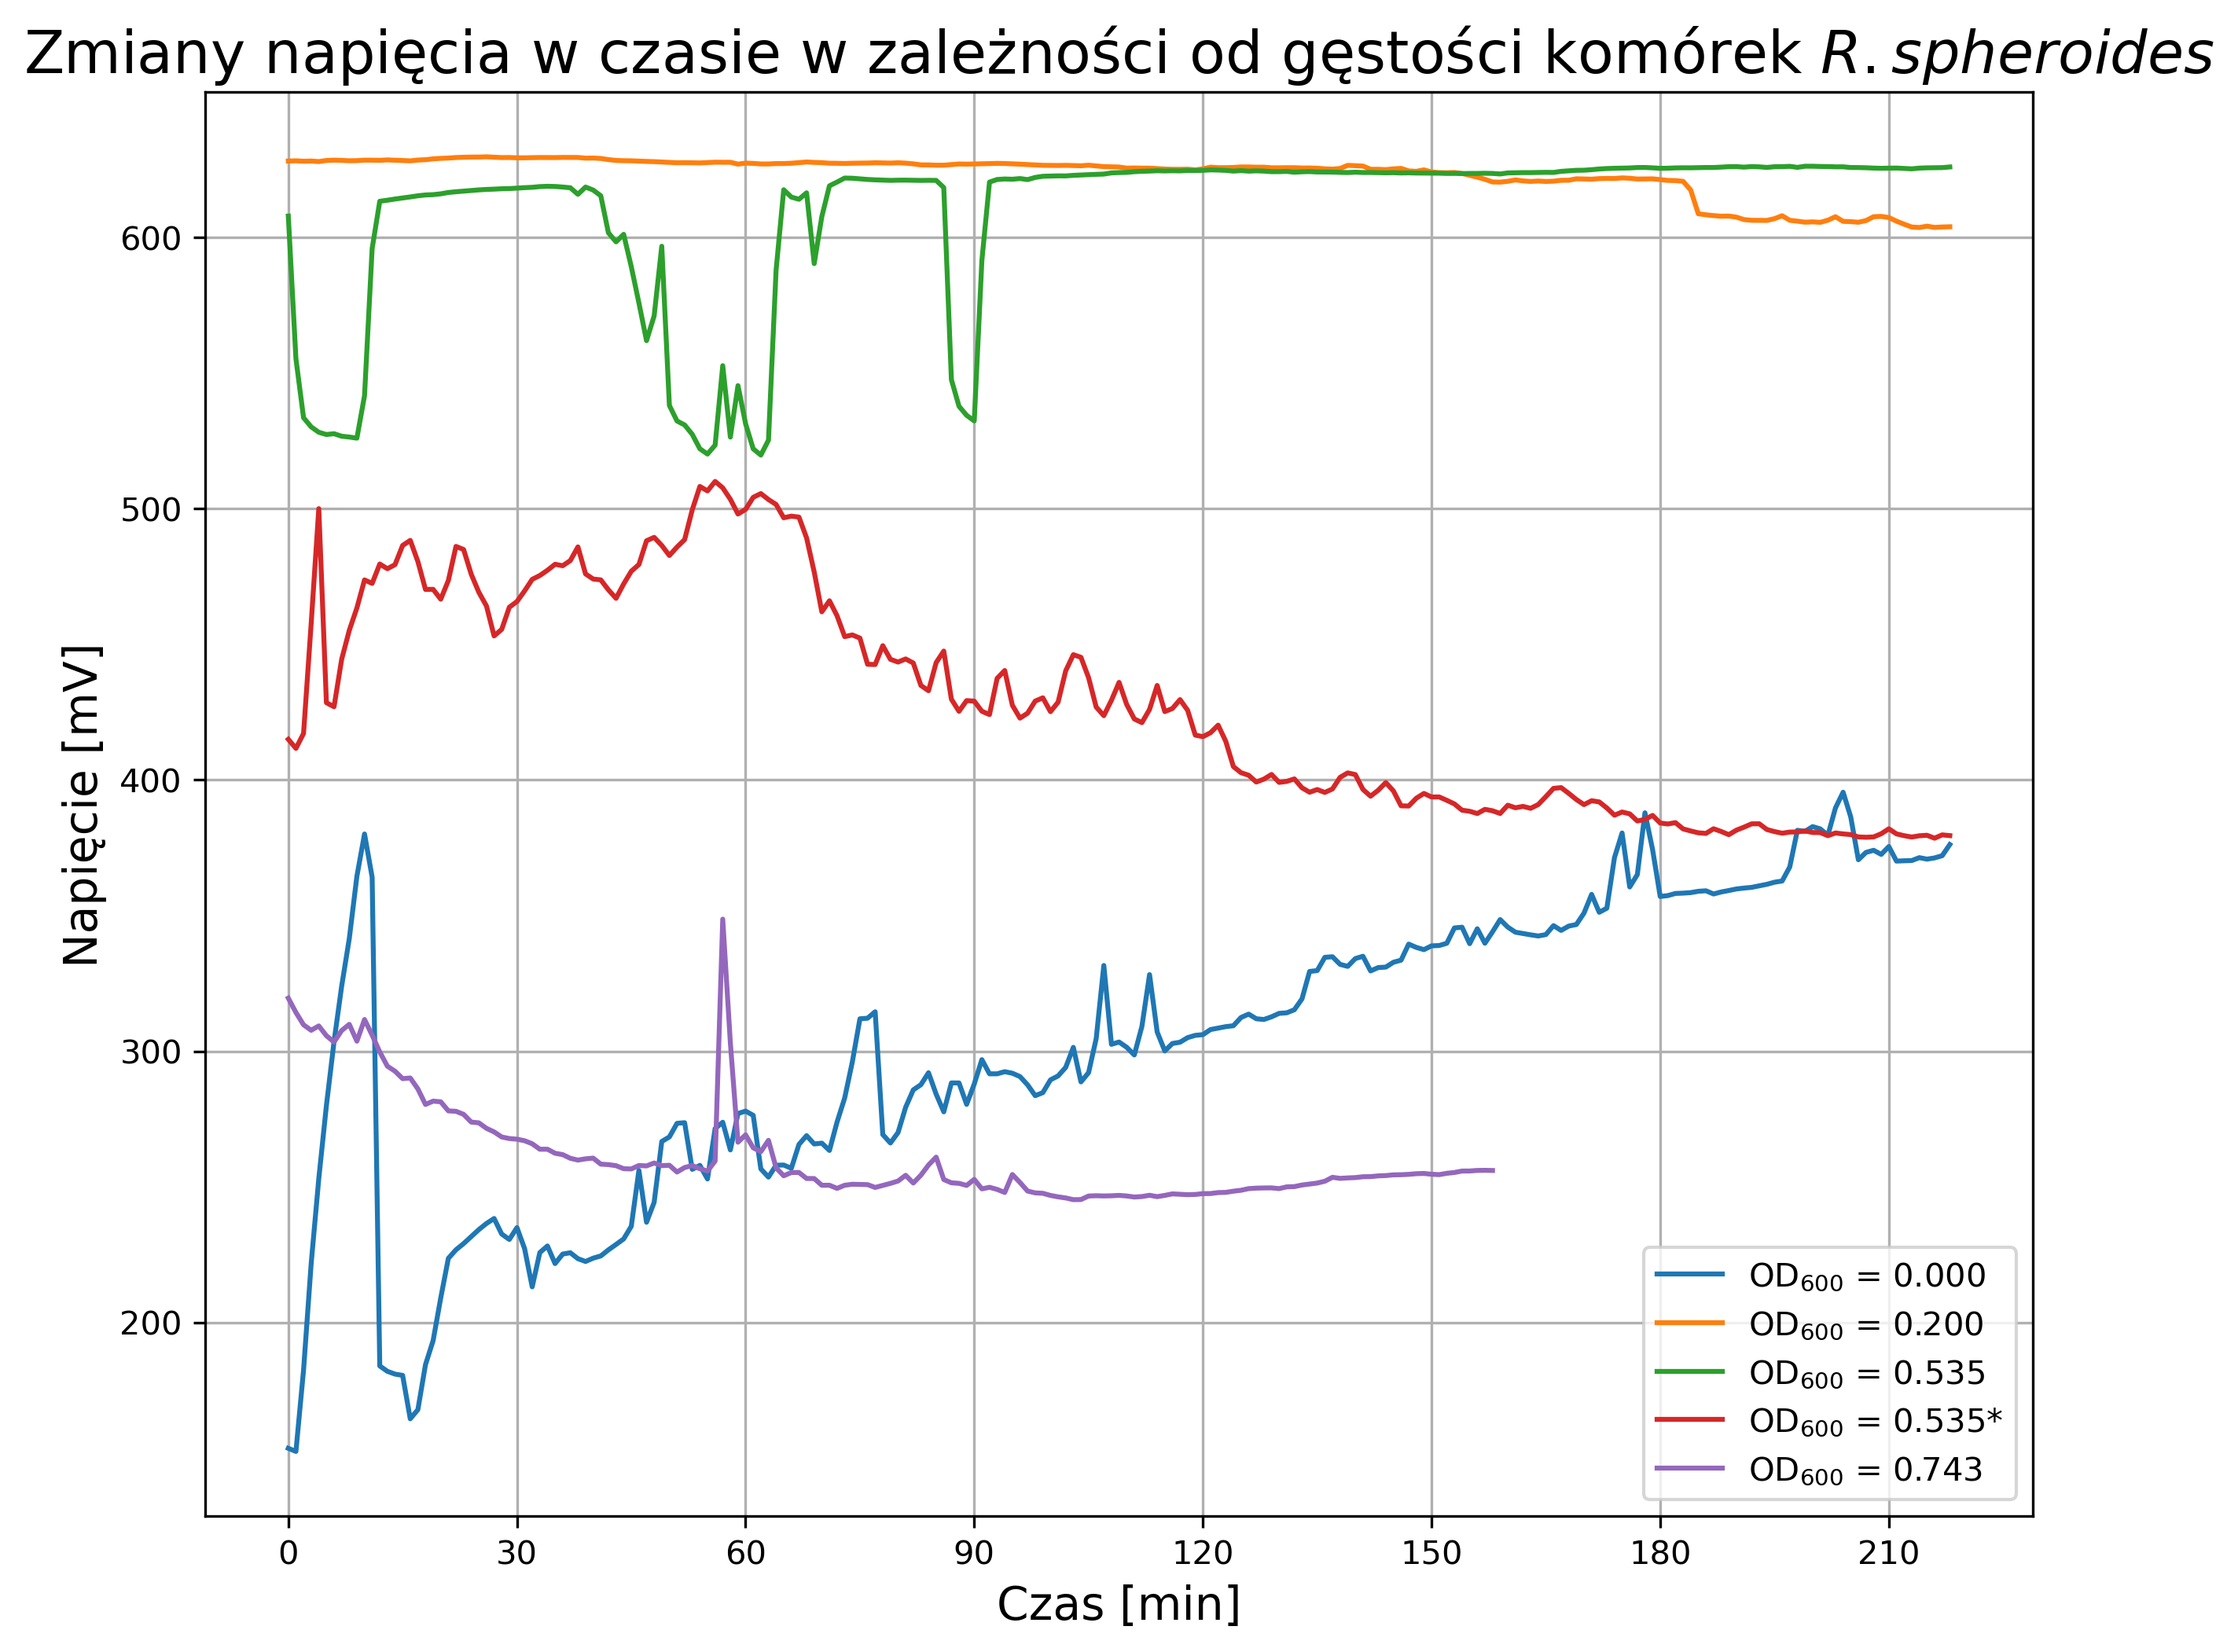

In [5]:
fig1 = plt.figure(figsize=(10, 8), dpi=300, facecolor='#ffffff')

legend = []
factor = 1

for file in files:
    final_df = process(file)

    plt.errorbar(
        x=final_df['minute'],
        y=final_df['mean300s'] * factor,
        # yerr = final_df['error'],
        fmt='-',
    )

    if 'X' in file:
        file = file.replace('X', '*')
    series_name = 'OD$_{600}$ = ' + f'{file[5:-4]}'
    legend.append(series_name)
    factor = 1000

final_df.head()

plt.title(
    '''Zmiany napięcia w czasie w zależności od gęstości komórek $R. spheroides$''',
    fontdict={
        'fontsize': 18,
        'multialignment': 'center'
    }
)
plt.ylabel(
    'Napięcie [mV]',
    fontdict={'fontsize': 14}
)
plt.xlabel(
    'Czas [min]',
    fontdict={'fontsize': 14}
)
plt.legend(legend)
plt.grid()
plt.xticks([0, 30, 60, 90, 120, 150, 180, 210])
fig1.savefig('../manuscript/figures/voltage1.png')

plt.show()

Wykres słupkowy przedstawiający uśrednione napięcie z ostatnich 30 minut pomiaru dla różnych gęstości hodowli. Słupki błędu to SEM.

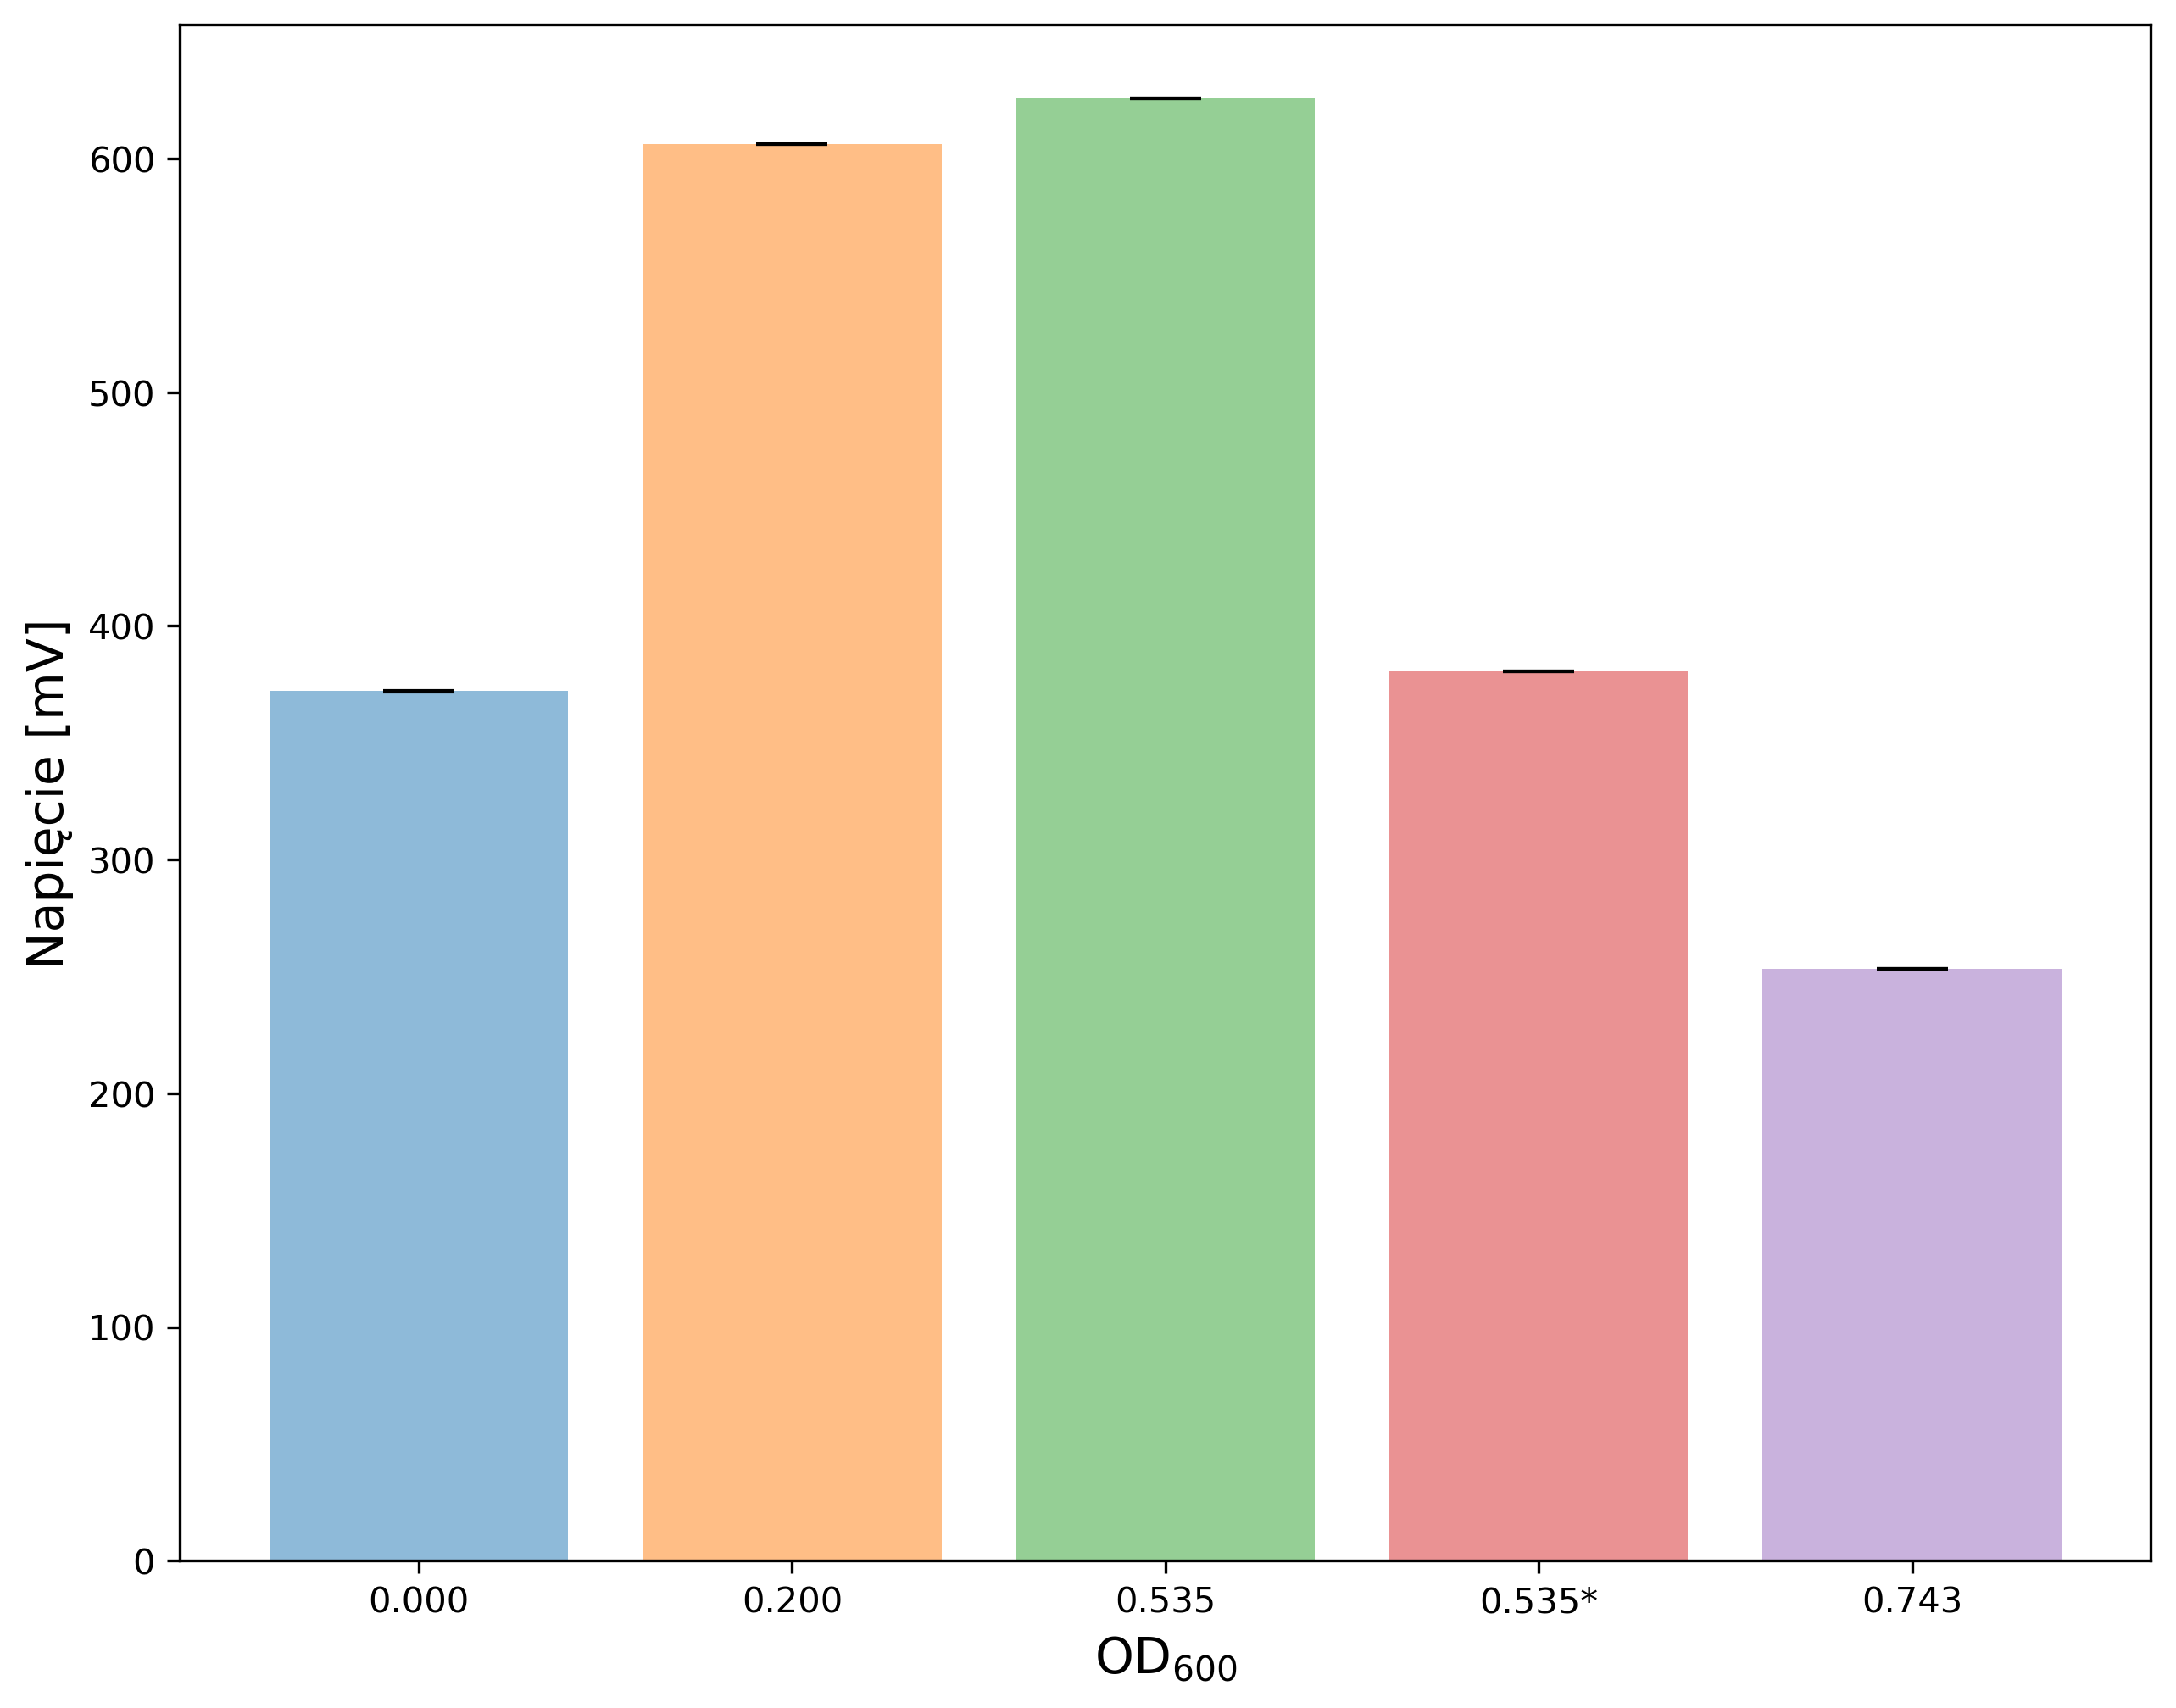

In [6]:
fig2, ax = plt.subplots(figsize=(10, 8), dpi=300, facecolor='#ffffff')

factor = 1
for file in files:
    final_df = process(file)

    if 'X' in file:
        file = file.replace('X', '*')
    series_name = f'{file[5:-4]}'

    ax.bar(
        x=series_name,
        height=final_df['mean30m'][1]*factor,
        yerr=final_df['error30m'][1]*factor,
        align='center',
        alpha=0.5,
        ecolor='black',
        capsize=10
    )
    factor = 1000

plt.ylabel('Napięcie [mV]', fontdict={'fontsize' : 14})
plt.xlabel('OD$_{600}$', fontdict={'fontsize' : 14})
fig2.savefig('../manuscript/figures/voltage2.png')
plt.show()

Wykres słupkowy przedstawiający uśrednione napięcie z całego pomiaru dla różnych gęstości hodowli. Słupki błędu to SEM.

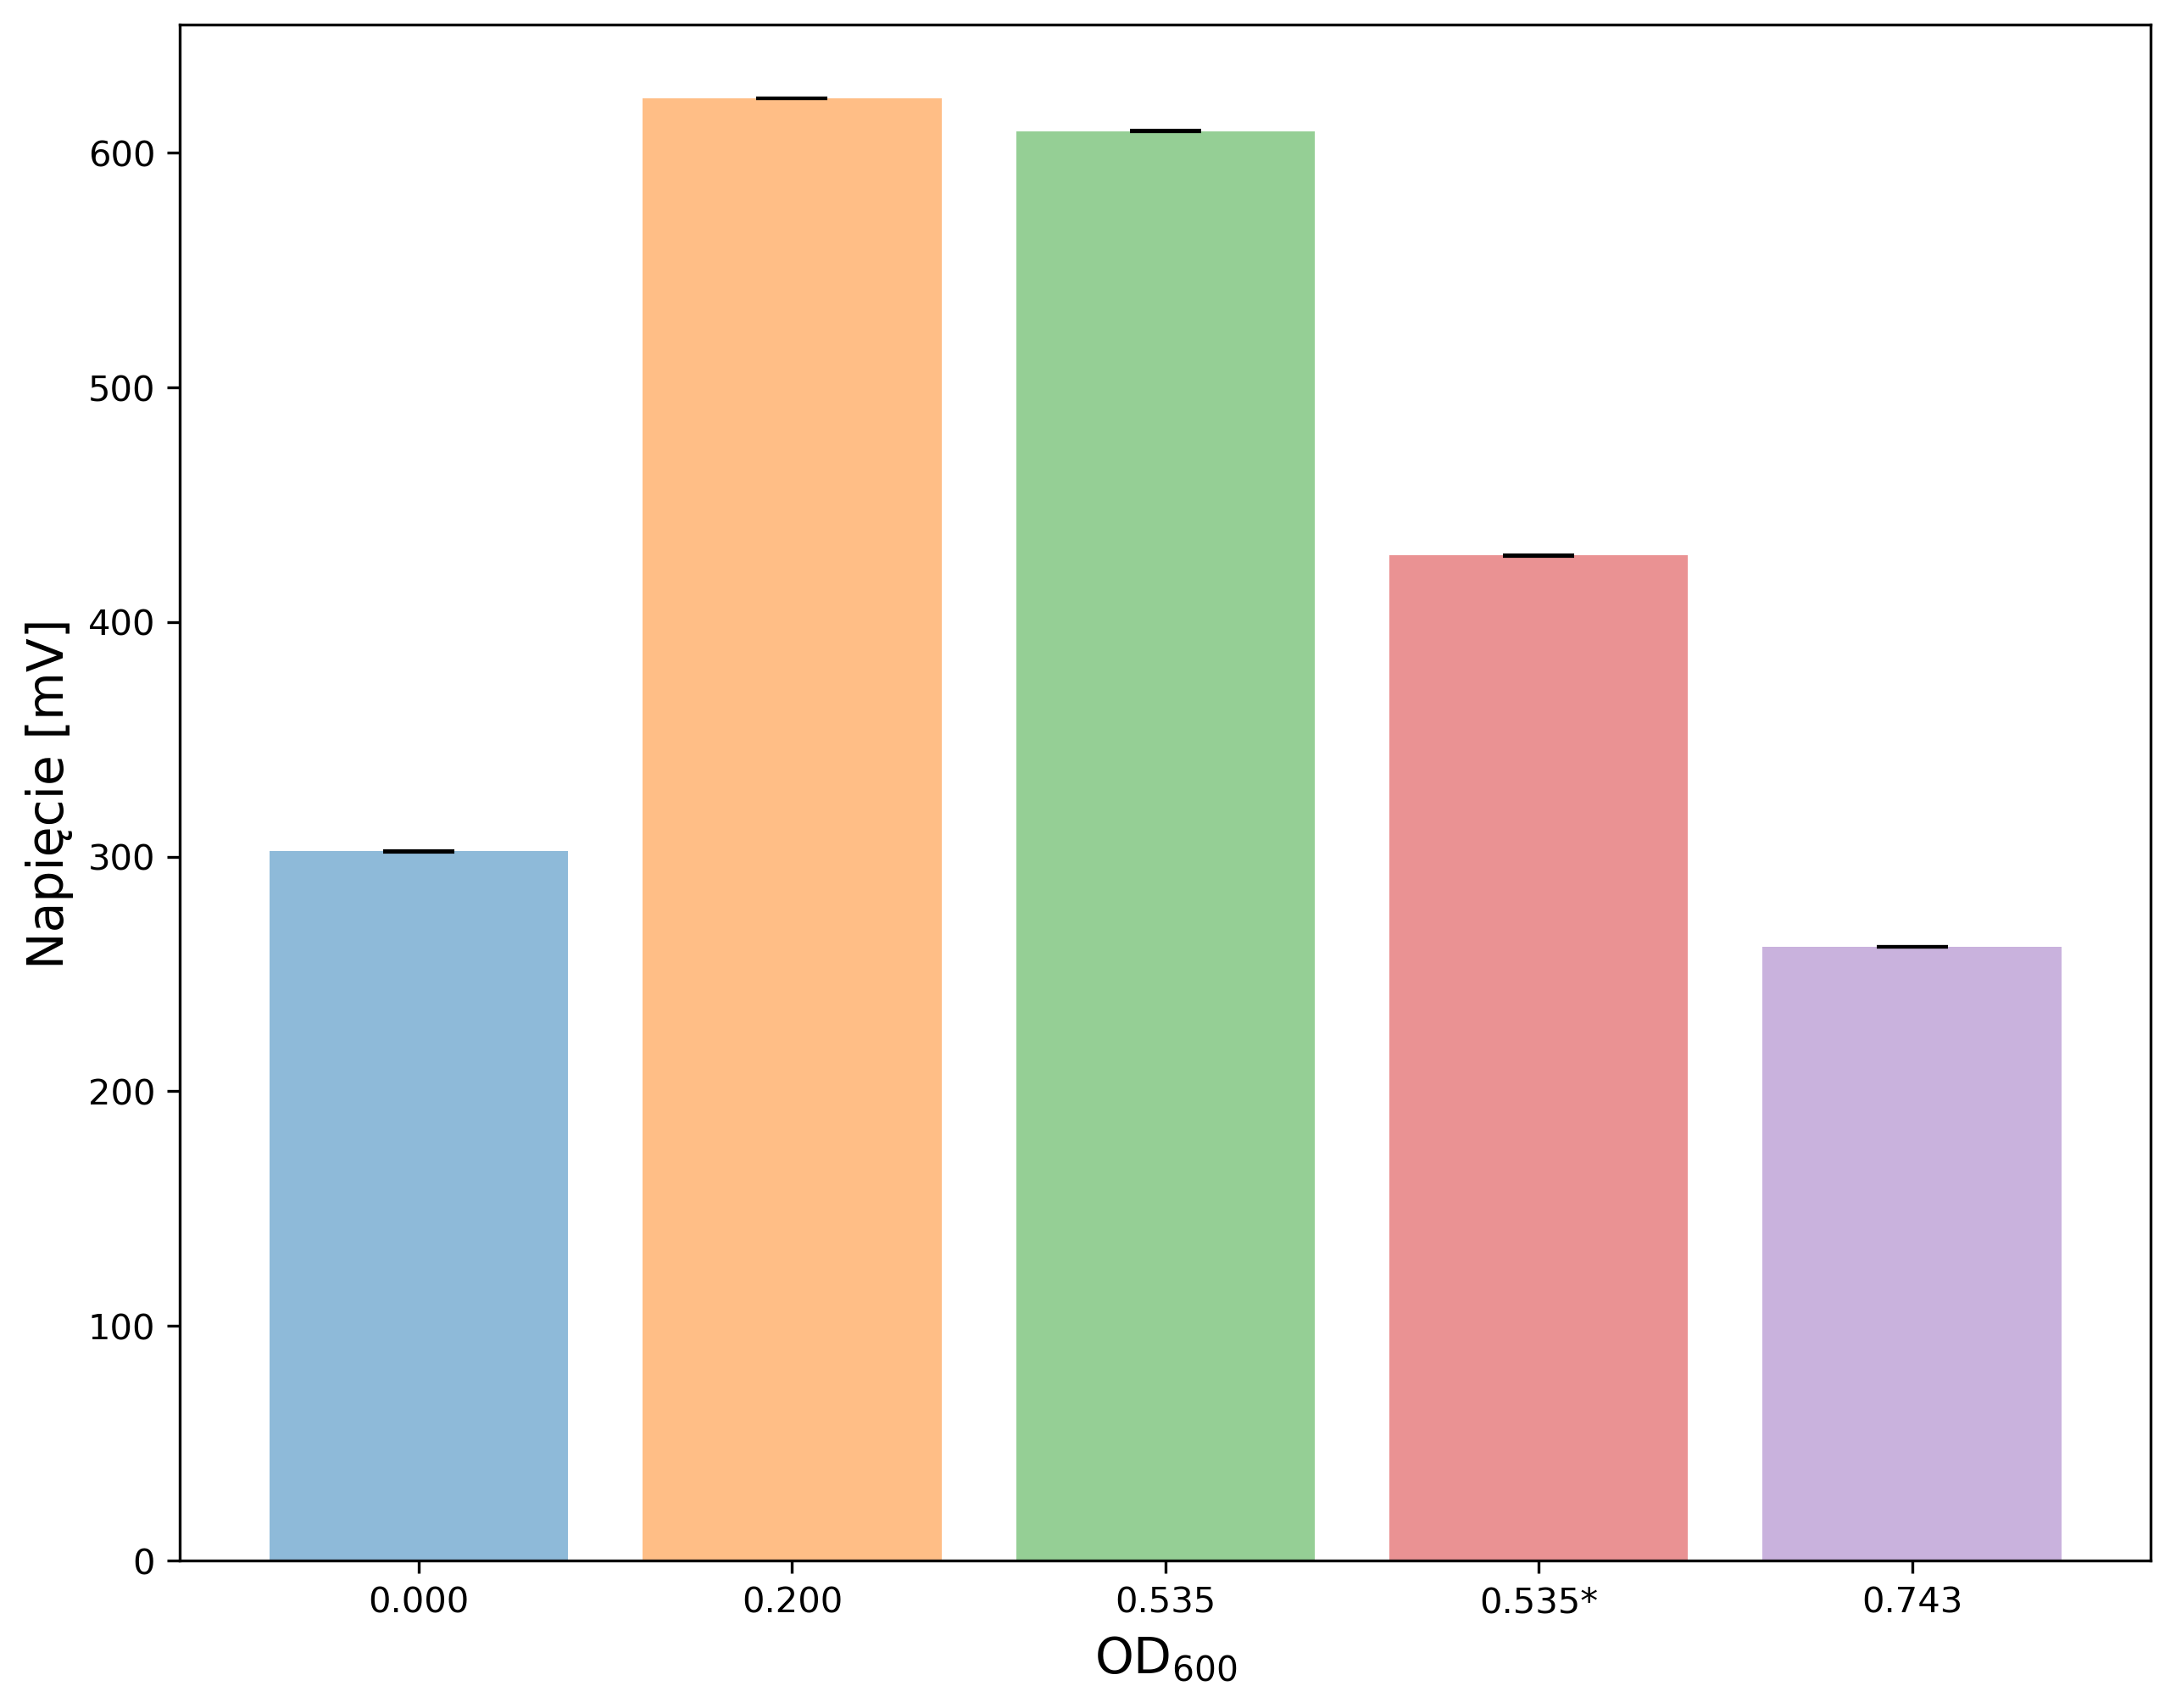

In [7]:
fig3, ax = plt.subplots(figsize=(10, 8), dpi=300, facecolor='#ffffff')

factor = 1
for file in files:
    final_df = process(file)

    if 'X' in file:
        file = file.replace('X', '*')
    series_name = f'{file[5:-4]}'

    ax.bar(
        x=series_name,
        height=final_df['meanfull'][1]*factor,
        yerr=final_df['errfull'][1]*factor,
        align='center',
        alpha=0.5,
        ecolor='black',
        capsize=10
    )
    factor = 1000

plt.ylabel('Napięcie [mV]', fontdict={'fontsize' : 14})
plt.xlabel('OD$_{600}$', fontdict={'fontsize' : 14})
fig3.savefig('../manuscript/figures/voltage3.png')
plt.show()

\*pomiar wykonano po 24 h adaptacji mikroorganizmów do elektrody